# **Ávore de Decisão**
**Mini-projeto 2 - Sistemas Inteligentes**

Prof. Germano Crispim Vasconcelos

Equipe 6
- Alice Oliveira - aoqb
- Ana Albuquerque - alas3
- Enrique Laborão - elm2
- Victória Luisi - vlsc
- Olivia Tavares - obtmc

## ⚙️ **Setup**

Importando dependências, conectando Google Drive, lendo datasets e criando os respectivos dataframes.

### Dependências

In [122]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

### Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

base_path = '/content/drive/MyDrive/'

Mounted at /content/drive


IRIS Dataset - https://www.kaggle.com/datasets/arshid/iris-flower-dataset

In [3]:
iris_dataset_path = base_path + 'IRIS.csv'

Titanic Dataset - https://www.kaggle.com/c/titanic/data

In [4]:
titanic_train_dataset_path = base_path + 'titanic/train.csv'
titanic_test_dataset_path = base_path + 'titanic/test.csv'

Lower Back Pain Symptoms Dataset - https://www.kaggle.com/datasets/sammy123/lower-back-pain-symptoms-dataset

In [204]:
pain_dataset_path = base_path + 'Dataset_spine.csv'

### Lendo datasets


In [5]:
iris_df = pd.read_csv(iris_dataset_path)

In [6]:
titanic_df = pd.read_csv(titanic_train_dataset_path)
titanic_test_df = pd.read_csv(titanic_test_dataset_path) # Não possui a coluna de classificação (Survived)

In [230]:
pain_df = pd.read_csv(pain_dataset_path)
pain_df = pain_df.drop(pain_df.columns[[13]], axis=1) # Removendo a coluna 13

### Funções

In [98]:
def plot_confusion_matrix(y_test, y_pred):
  cm = confusion_matrix(y_test, y_pred)
  fig, ax = plt.subplots(figsize=(2,2))
  sns.heatmap(cm, annot=True, fmt='d')

## 🧪 **Experimento: Iris Flower Dataset**

### 🔎 Análise do Dataset

In [ ]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
iris_df['species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [ ]:
iris_df['species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

In [ ]:
#iris_df.describe()

In [ ]:
#sns.pairplot(iris_df, hue ='species')

In [ ]:
#iris_df.hist(bins=50, figsize=(5,5))
#plt.show()

In [ ]:
#sns.set_style("whitegrid")
#data = np.random.normal(size=(20, 6)) + np.arange(6) / 2
#sns.set(rc={'figure.figsize':(7,4)})
#sns.boxplot(data = iris_df.iloc[:,:-1])

### 🛠️ Criando modelo


In [ ]:
iris_x = iris_df.iloc[:, :-1]
iris_y = iris_df.iloc[:, -1]
iris_x_train, iris_x_test, iris_y_train, iris_y_test = train_test_split(iris_x, iris_y, test_size = 0.25, random_state = 0) 

In [ ]:
classifier = DecisionTreeClassifier()  
classifier.fit(iris_x_train, iris_y_train)

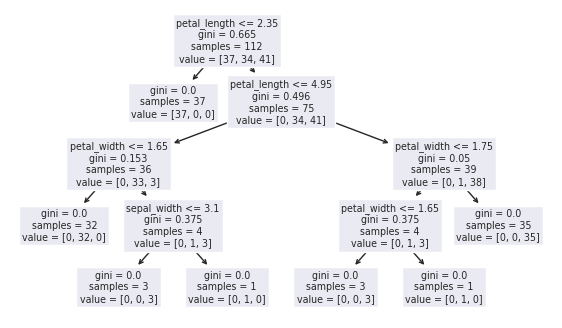

In [ ]:
plot_tree(classifier, feature_names=iris_df.columns[: -1])
plt.show()

In [ ]:
iris_y_pred = classifier.predict(iris_x_test)

In [ ]:
report = classification_report(iris_y_test, iris_y_pred)

In [ ]:
print(report)

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       1.00      0.94      0.97        16
 Iris-virginica       0.90      1.00      0.95         9

       accuracy                           0.97        38
      macro avg       0.97      0.98      0.97        38
   weighted avg       0.98      0.97      0.97        38



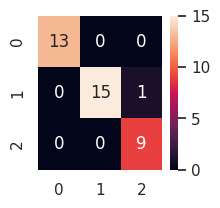

In [ ]:
plot_confusion_matrix(iris_y_test, iris_y_pred)

## 🛳️ **Projeto: Titanic Dataset**

### 🔎 Análise e limpeza do Dataset

#### Valores faltantes
A primeira análise feita é verificar os valores faltantes. **Três colunas possuem valores nulos: Age, Cabin e Embarked.** Cada coluna terá um tratamento apropriado.

In [9]:
titanic_df.shape

(891, 12)

In [10]:
#titanic_df.info()
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

##### Age

- Como é uma coluna de valores numéricos, que a maioria dos valores não é nulo e que acreditamos ter grande relevância para a sobrevivência ou não, será utilizado um método de substituir os valores nulos por um outro valor.
- No plot vemos que se aproxima de uma distribuição assimétrica para a direita, então, então podemos **substituir os valores faltantes pela mediana**. [[1]](https://vitalflux.com/pandas-impute-missing-values-mean-median-mode/#How_to_decide_which_imputation_technique_to_use)
- 🚩 **Idealmente, deveríamos analisar a correlação entre a idade e outras features, observando a existência de uma correlação, então os valores nulos deveriam ser substituídos pela mediana do subconjunto (separado pelas outras features correlacionadas).**

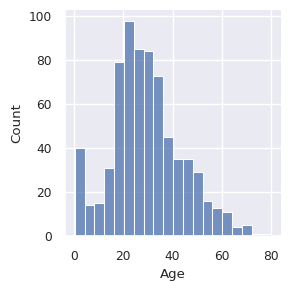

In [11]:
sns.set(font_scale=0.8) 
sns.displot(titanic_df['Age'], height=3)
plt.show()

In [12]:
titanic_df['Age'] = titanic_df['Age'].fillna(titanic_df['Age'].median())

##### Cabin

- A maioria dos valores são nulos (687 de 891), não são numéricos e possuem muitos valores únicos.
- Poderia ser feita uma tentativa de extrair informações relevantes dos dados que existem, visto que as strings consistem de uma letra seguida por um ou dois números, podemos deduzir que está relacionada a posição da cabine no navio, podendo então influenciar na sobrevivência de um passageiro. [[2]](https://www.kaggle.com/code/ccastleberry/titanic-cabin-features/notebook)
- Entretanto, optaremos por **descartar a coluna** devido a quantidade de valores faltantes.

In [13]:
titanic_df['Cabin'].value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

In [14]:
titanic_df = titanic_df.drop(columns=['Cabin'])

##### Embarked

- Como se tratam de valores categóricos, os dois valores faltantes serão subsituídos pela moda.

In [15]:
titanic_df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [16]:
titanic_df['Embarked'] = titanic_df['Embarked'].fillna(titanic_df['Embarked'].mode()[0])

In [17]:
titanic_df['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

#### Colunas consideradas irrelevantes

Algumas colunas possuem informações irrelevantes: identificadores que não apresentam relação direta com algo que possa definir a sobrevivência ou são valores aleatórios:
- PassengerId
- Ticket

In [18]:
titanic_df = titanic_df.drop(columns=['PassengerId'])
titanic_df = titanic_df.drop(columns=['Ticket'])

#### Substituição dos valores categóricos por numéricos


##### Name

- Essa coluna é composta apenas de valores únicos, mas todos os indivíduos possuem títulos (Mr., Mrs., Miss., etc).
- É possível extrair a informação do título do passageiro e criar uma nova coluna.

In [19]:
titanic_df['Name'].unique().size

891

In [20]:
titles = titanic_df.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
print(titles.size)
titles.value_counts()

891


Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: Name, dtype: int64

- Como Mr, Miss, Mrs e Master são os únicos títulos que se repetem mais de dez vezes, vamos optar por substituir o restante por 'Other'. E outros títulos que equivalem a esses títulos também serão subsituídos.
- O seguinte mapeamento será feito:
  - Mr = 0, Mrs = 1, Miss = 2, Master = 3, Other = 4

In [21]:
titles = titles.replace(['Lady', 'Countess','Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Other')
titles = titles.replace('Mlle', 'Miss')
titles = titles.replace('Ms', 'Miss')
titles = titles.replace('Mme', 'Mrs')
titles = titles.map({"Mr": 0, "Mrs": 1, "Miss": 2, "Master": 3, "Other": 4})
titles.value_counts()

0    517
2    185
1    126
3     40
4     23
Name: Name, dtype: int64

In [22]:
titanic_df = titanic_df.drop(columns=['Name'])

In [23]:
titanic_df['Title'] = titles

##### Outras colunas

In [24]:
titanic_df['Sex'].unique()

array(['male', 'female'], dtype=object)

In [25]:
titanic_df['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

Antes de treinar o modelo, é necessário converter algumas colunas de uma string para um valor numérico.
- Sex (male = 0, female = 1)
- Embarked (S = 0, C = 1, Q = 2)



In [26]:
titanic_df['Sex'] = titanic_df['Sex'].map({'male': 0, 'female': 1})

In [27]:
titanic_df['Embarked'] = titanic_df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

#### Combinar colunas

- Podemos combinar as colunas Sibsp e Parch para ter uma coluna representando o tamanho da família.

In [28]:
#family = titanic_df['SibSp'] + titanic_df['Parch']
#titanic_df['Family'] = family

In [29]:
#titanic_df = titanic_df.drop(columns=['SibSp', 'Parch'])

#### Dataset após limpeza



In [30]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    int64  
 8   Title     891 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 62.8 KB


In [31]:
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,0,0
1,1,1,1,38.0,1,0,71.2833,1,1
2,1,3,1,26.0,0,0,7.9250,0,2
3,1,1,1,35.0,1,0,53.1000,0,1
4,0,3,0,35.0,0,0,8.0500,0,0


### 🛠️ Criando modelo

In [32]:
titanic_x = titanic_df.drop(columns=['Survived'])
titanic_y = titanic_df['Survived']

titanic_x_train, titanic_x_test, titanic_y_train, titanic_y_test = train_test_split(titanic_x, titanic_y, test_size = 0.2)

#### **1. Classificador com parâmetros default**

In [ ]:
classifier1 = DecisionTreeClassifier()  
classifier1.fit(titanic_x_train, titanic_y_train)

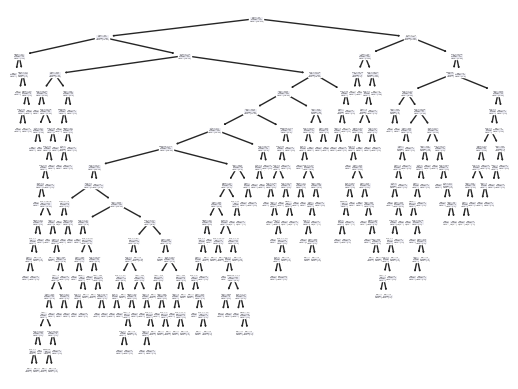

In [256]:
plot_tree(classifier1, feature_names=titanic_df.drop(columns=['Survived']).columns)
plt.show()

In [257]:
titanic_y_pred = classifier1.predict(titanic_x_test)

In [258]:
titanic_report = classification_report(titanic_y_test, titanic_y_pred)
print(titanic_report)

              precision    recall  f1-score   support

           0       0.86      0.81      0.84       116
           1       0.69      0.76      0.72        63

    accuracy                           0.79       179
   macro avg       0.77      0.79      0.78       179
weighted avg       0.80      0.79      0.80       179



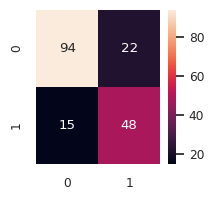

In [259]:
plot_confusion_matrix(titanic_y_test, titanic_y_pred)

              precision    recall  f1-score   support

           0       0.97      1.00      0.99       433
           1       1.00      0.96      0.98       279

    accuracy                           0.98       712
   macro avg       0.99      0.98      0.98       712
weighted avg       0.98      0.98      0.98       712



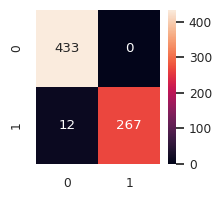

In [261]:
titanic_y_pred = classifier1.predict(titanic_x_train)
titanic_report = classification_report(titanic_y_train, titanic_y_pred)
print(titanic_report)
plot_confusion_matrix(titanic_y_train, titanic_y_pred)

#### **2. Utilizando GridSearchCV**



In [262]:
parameters = {
    'criterion': ["gini", "entropy", "log_loss"],
    'splitter': ["best", "random"],
    'max_depth': [3, 10, 30, None],
    'max_features': ["sqrt", "log2", None],
    'min_samples_split': [2, 16, 32],
    'max_leaf_nodes': [5, 10, 40, None],
    'random_state': [13, 42, 84, None]
}

In [263]:
classifier = DecisionTreeClassifier()  

In [264]:
grid = GridSearchCV(estimator = classifier, param_grid = parameters)
grid.fit(titanic_x_train, titanic_y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [3, 10, 30, None],
                         'max_features': ['sqrt', 'log2', None],
                         'max_leaf_nodes': [5, 10, 40, None],
                         'min_samples_split': [2, 16, 32],
                         'random_state': [13, 42, 84, None],
                         'splitter': ['best', 'random']})

In [265]:
print(grid.best_score_)
print(grid.best_params_)

0.8343346794051021
{'criterion': 'gini', 'max_depth': 30, 'max_features': None, 'max_leaf_nodes': 40, 'min_samples_split': 2, 'random_state': None, 'splitter': 'best'}


In [ ]:
classifier2 = DecisionTreeClassifier(criterion= 'gini',
                                    max_depth= 30,
                                    max_features= None,
                                    max_leaf_nodes= 40,
                                    min_samples_split= 2,
                                    random_state= None,
                                    splitter= 'best')
classifier2.fit(titanic_x_train, titanic_y_train)

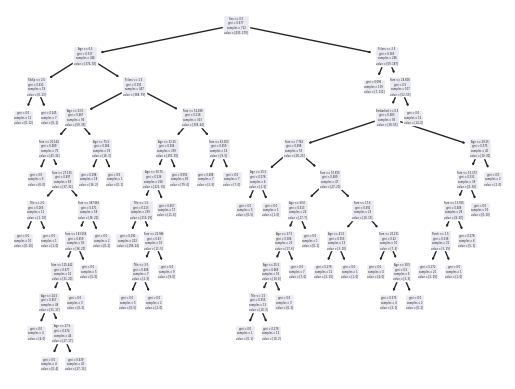

In [283]:
plot_tree(classifier2, feature_names=titanic_df.drop(columns=['Survived']).columns)
plt.show()

              precision    recall  f1-score   support

           0       0.87      0.94      0.90       116
           1       0.87      0.73      0.79        63

    accuracy                           0.87       179
   macro avg       0.87      0.83      0.85       179
weighted avg       0.87      0.87      0.86       179



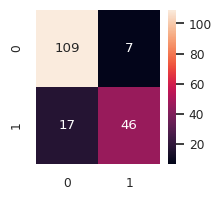

In [288]:
titanic_y_pred = classifier2.predict(titanic_x_test)
titanic_report = classification_report(titanic_y_test, titanic_y_pred)
print(titanic_report)
plot_confusion_matrix(titanic_y_test, titanic_y_pred)

Checando overfitting:

              precision    recall  f1-score   support

           0       0.89      0.97      0.93       433
           1       0.95      0.81      0.87       279

    accuracy                           0.91       712
   macro avg       0.92      0.89      0.90       712
weighted avg       0.91      0.91      0.90       712



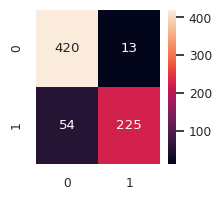

In [287]:
titanic_y_pred = classifier2.predict(titanic_x_train)
titanic_report = classification_report(titanic_y_train, titanic_y_pred)
print(titanic_report)
plot_confusion_matrix(titanic_y_train, titanic_y_pred)

#### **3. Tentando obter uma árvore menor com score similar**

In [272]:
parameters = {
    'criterion': ["gini", "entropy", "log_loss"],
    'splitter': ["best", "random"],
    'max_depth': [2, 4, 6],
    'max_features': ["sqrt", "log2", None],
    'min_samples_split': [2, 4, 8],
    'max_leaf_nodes': [4, 7, 10],
    'random_state': [13, 42, 84, None]
}

In [273]:
classifier = DecisionTreeClassifier()

In [ ]:
grid = GridSearchCV(estimator = classifier, param_grid = parameters)
grid.fit(titanic_x_train, titanic_y_train)

In [275]:
print(grid.best_score_)
print(grid.best_params_)

0.8329065300896286
{'criterion': 'gini', 'max_depth': 4, 'max_features': None, 'max_leaf_nodes': 10, 'min_samples_split': 2, 'random_state': 13, 'splitter': 'random'}


In [ ]:
classifier3 = DecisionTreeClassifier(criterion= 'gini',
                                    max_depth= 4,
                                    max_features= None,
                                    max_leaf_nodes= 10,
                                    min_samples_split= 2,
                                    random_state= 13,
                                    splitter= 'random')
classifier3.fit(titanic_x_train, titanic_y_train)

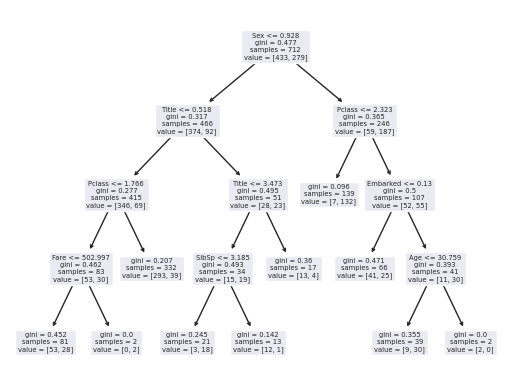

In [277]:
plot_tree(classifier3, feature_names=titanic_df.drop(columns=['Survived']).columns)
plt.show()

              precision    recall  f1-score   support

           0       0.84      0.93      0.88       116
           1       0.84      0.67      0.74        63

    accuracy                           0.84       179
   macro avg       0.84      0.80      0.81       179
weighted avg       0.84      0.84      0.83       179



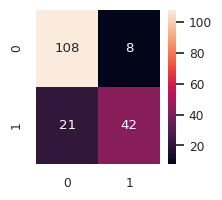

In [294]:
titanic_y_pred = classifier3.predict(titanic_x_test)
titanic_report = classification_report(titanic_y_test, titanic_y_pred)
print(titanic_report)
plot_confusion_matrix(titanic_y_test, titanic_y_pred)

**Verificando overfitting**

              precision    recall  f1-score   support

           0       0.81      0.96      0.88       433
           1       0.91      0.65      0.76       279

    accuracy                           0.84       712
   macro avg       0.86      0.80      0.82       712
weighted avg       0.85      0.84      0.83       712



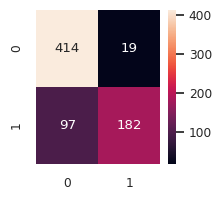

In [281]:
titanic_y_pred = classifier3.predict(titanic_x_train)
titanic_report = classification_report(titanic_y_train, titanic_y_pred)
print(titanic_report)
plot_confusion_matrix(titanic_y_train, titanic_y_pred)

## 🎲 **Utilizando Random Forests**

Aplicando o RandomForestClassifier com a configuração default no problema Titanic.

In [ ]:
classifier4 = RandomForestClassifier()
classifier4.fit(titanic_x_train, titanic_y_train)

In [129]:
titanic_y_pred = classifier4.predict(titanic_x_test)

In [130]:
titanic_report = classification_report(titanic_y_test, titanic_y_pred)
print(titanic_report)

              precision    recall  f1-score   support

           0       0.88      0.86      0.87       116
           1       0.75      0.78      0.77        63

    accuracy                           0.83       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179



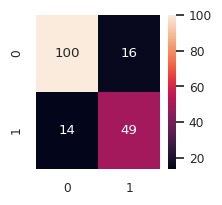

In [131]:
plot_confusion_matrix(titanic_y_test, titanic_y_pred)

## ⛑️ **Utilizando AD no problema de Detecção de Lombalgia**

In [290]:
pain_x = pain_df.drop(columns=['Class_att'])
pain_y = pain_df['Class_att']

pain_x_train, pain_x_test, pain_y_train, pain_y_test = train_test_split(pain_x, pain_y, test_size = 0.3)

In [ ]:
classifier5 = DecisionTreeClassifier()  
classifier5.fit(pain_x_train, pain_y_train)

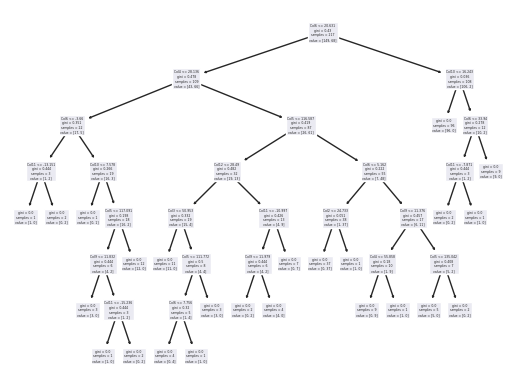

In [292]:
plot_tree(classifier5, feature_names=pain_df.drop(columns=['Class_att']).columns)
plt.show()

              precision    recall  f1-score   support

    Abnormal       0.88      0.80      0.84        61
      Normal       0.68      0.78      0.72        32

    accuracy                           0.80        93
   macro avg       0.78      0.79      0.78        93
weighted avg       0.81      0.80      0.80        93



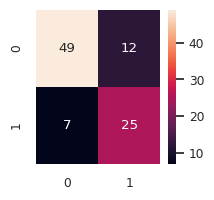

In [293]:
pain_y_pred = classifier5.predict(pain_x_test)
pain_report = classification_report(pain_y_test, pain_y_pred)
print(pain_report)
plot_confusion_matrix(pain_y_test, pain_y_pred)

## ✏️ **Conclusão**

### **Titanic**

**Árvore com configuração padrão:**
  - Acurácia na base de teste: 0.79
  - Acurácia na base de treino: 0.98 (overfitting!)

**Árvore com configuração 1:**

```
{'criterion': 'gini', 'max_depth': 30, 'max_features': None, 'max_leaf_nodes': 40, 'min_samples_split': 2, 'random_state': None, 'splitter': 'best'}
```

  - Maior score no grid: 0.83
  - Acurácia na base de teste: 0.87
  - Acurácia na base de treino: 0.91

**Árvore com configuração 2:**

```
{'criterion': 'gini', 'max_depth': 4, 'max_features': None, 'max_leaf_nodes': 10, 'min_samples_split': 2, 'random_state': 13, 'splitter': 'random'}
```

  - Maior score no grid: 0.83
  - Acurácia na base de teste: 0.84
  - Acurácia na base de treino: 0.84

**Random Forest** com configuração padrão

  - Acurácia: 0.83



### **Detecção de Lombalgia**

  - Acurácia com MLP: 0.82
  - Acurácia com AD (configuração padrão): 0.80